# Demonstration of ResNet Code Recipe

from the paper: "Deep Residual Learning for Image Recognition", He et al. (2015)
[arXiv:1512.03385]
https://github.com/KaimingHe/deep-residual-networks (Shaoqing Ren)
License: see https://github.com/KaimingHe/deep-residual-networks/blob/master/LICENSE

## Further References

Based on visualization from

- ResNet 50: http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006
- ResNet 101: http://ethereon.github.io/netscope/#/gist/b21e2aae116dc1ac7b50
- ResNet 152: http://ethereon.github.io/netscope/#/gist/d38f3e6091952b45198b

Weights from http://www.vlfeat.org/matconvnet/pretrained/

Code only slightly adapted, original one from https://github.com/Lasagne/Recipes

## Classification Experiments

In [1]:
from recipes import resnet

import os
import numpy as np
from pylab import *
from scipy.misc import face
%matplotlib inline

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5004)


Load ImageNet class names

In [2]:
classes = {}
for l in open("res/imagenet-classes.txt", "r").readlines():
    parts = l.replace('\n',"")
    nb, name = parts[:4], parts[4:]
    classes[int(nb)] = name

Build the model.

In [3]:
pred_fn = resnet.predict_fn(variant="resnet50", weightdir="weights")

Download some sample images. This list can be easily extended, have a look at http://www.publicdomainpictures.net/

In [4]:
from urllib.request import urlretrieve

urllist =[
    "http://www.publicdomainpictures.net/pictures/60000/velka/happy-bouncing-dog.jpg",
    "http://www.publicdomainpictures.net/pictures/20000/velka/cat-background.jpg",
    "http://www.publicdomainpictures.net/pictures/60000/velka/bolas-de-futebol-americano.jpg",
    "http://www.publicdomainpictures.net/pictures/120000/velka/the-basketball-shot.jpg"
]
namelist = [
    "dog", "cat", "football", "basketball"
]

imgs = []
for url,name in zip(urllist, namelist):
    path = "res/" + name+".jpg"
    if not os.path.exists(path):
        urlretrieve(url, path)
print("Done.")

Done.


Classification of the test images.
For each image, the top-5 guesses as well as their probabilities will be computed.

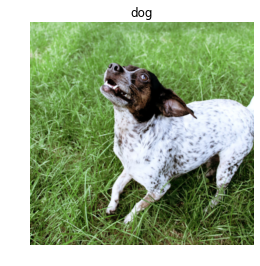

class 210, German short-haired pointer: p = 0.9069973230361938
class 164, bluetick: p = 0.07059327512979507
class 179, Staffordshire bullterrier, Staffordshire bull terrier: p = 0.0034962024074047804
class 217, English springer, English springer spaniel: p = 0.0034711852204054594
class 227, kelpie: p = 0.0020651216618716717


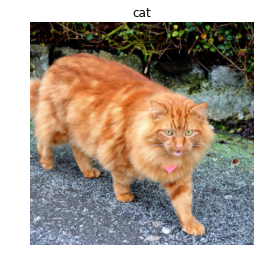

class 282, tiger cat: p = 0.7552874684333801
class 281, tabby, tabby cat: p = 0.10580487549304962
class 185, Norfolk terrier: p = 0.028696730732917786
class 260, chow, chow chow: p = 0.028032027184963226
class 265, toy poodle: p = 0.014232165180146694


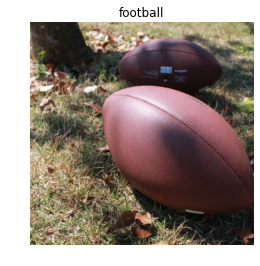

class 731, plunger, plumber's helper: p = 0.7086721062660217
class 747, punching bag, punch bag, punching ball, punchball: p = 0.1760372370481491
class 430, basketball: p = 0.046451810747385025
class 632, loudspeaker, speaker, speaker unit, loudspeaker system, speaker system: p = 0.04345383867621422
class 522, croquet ball: p = 0.006361322943121195


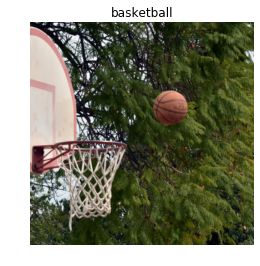

class 430, basketball: p = 0.9169568419456482
class 130, flamingo: p = 0.012253887951374054
class 129, spoonbill: p = 0.010256107896566391
class 706, patio, terrace: p = 0.0070013622753322124
class 417, balloon: p = 0.006787247024476528


In [5]:
from skimage.io import imread
from scipy.misc import imresize
from pylab import *
%matplotlib inline

def crop(I):
    I = I[...,:3]
    w,h = I.shape[:2]
    p = min(w,h)
    x = (w - p)//2
    y = (h - p)//2
    I = I[x:x+p,y:y+p,:]
    return imresize(I, (224,224)).astype("float32")

for name in namelist:
    img = crop(imread("res/" + name+".jpg"))
    imshow(img/255.)
    axis("off")
    title(name)
    show()
    
    y = pred_fn(img.transpose((2,0,1))[np.newaxis,:,:,:])
    idc = np.argsort(y[0,:])[::-1]
    for i in idc[:5]:
        print("class {}, {}: p = {}".format(i, classes[i], y[0,i]))

## Features

Build the feature extraction function

In [6]:
feat_fn = resnet.feature_fn(variant="resnet50", weightdir="weights")

Extract features from the image and visualize active parts of the feature maps.

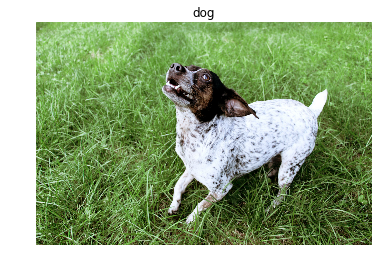

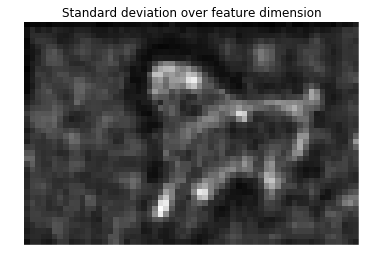

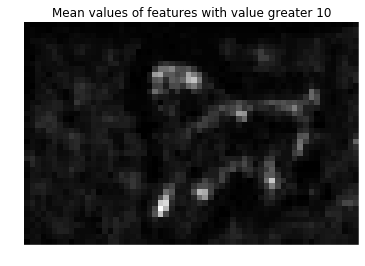

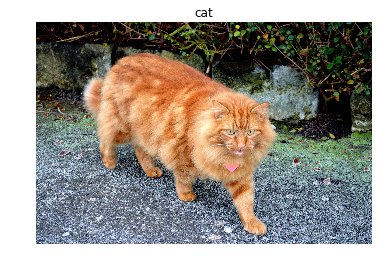

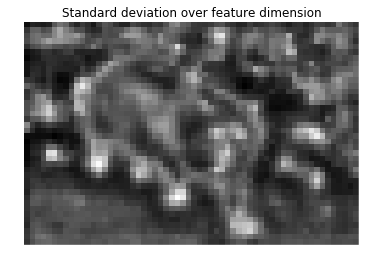

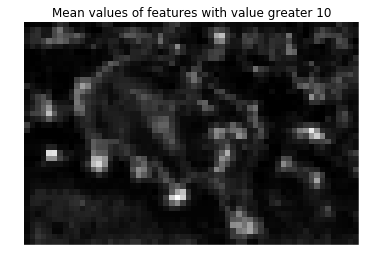

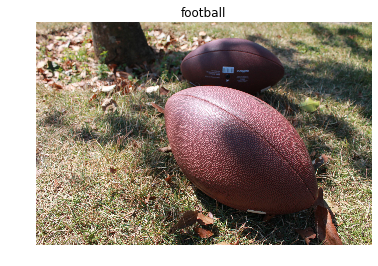

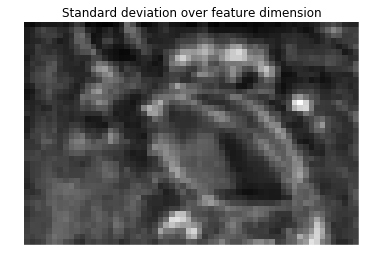

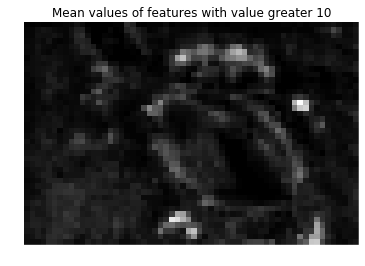

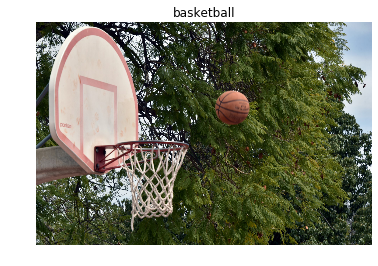

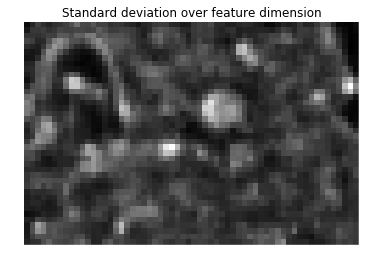

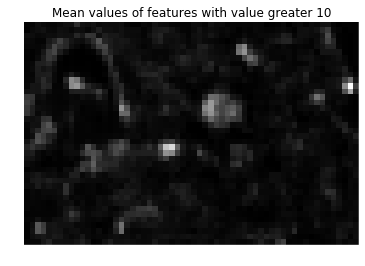

In [7]:
yy = []
for name in namelist:
    img = imread("res/" + name+".jpg")
    imshow(img/255.)
    axis("off")
    title(name)
    show()
    
    y = feat_fn(img.transpose((2,0,1))[np.newaxis,:,:,:])
    yy.append(y)
    imshow(y.std(axis=(1,))[0,...], cmap="gray", interpolation="none")
    axis("off")
    title("Standard deviation over feature dimension")
    show()   
    
    t = 0 + (y > 10)
    imshow(t.mean(axis=(1,))[0,...], cmap="gray", interpolation="none")
    axis("off")
    title("Mean values of features with value greater 10")
    show()